**<font size="6">Decision-Tree Classifier</font>**

# Entropy
* consider a binary classification problem
    * consider 3 features $f_1, f_2 and f_3$
    * ID-3 algorithm is to be used, so that a proper attribute can be chosen for a split to be caused at each node, w.r.t. a feature $f_i$
    * entropy is used for this selection process
* measures the purity of the split
* aim of a decision tree algorithm is to arrive at the leaf node as quickly as possible
    * at leaf node, *pure split* is guaranteed, i.e. either all samples split into class 1(they answer YES at the split site) or into class 0, **but not both**.
* $\textrm{H(s)} = -\textrm{p}_{\textrm{+}}\textrm{log(p}_{\textrm{+}}) -\textrm{p}_{\textrm{-}}\textrm{log(p}_{\textrm{-}}) $, + = positive class, - = negative class(this is obviosuly for binary classification), log to the *base 2*.
    * $\textrm{p}_{\textrm{+}}$ = % of positive samples, $\textrm{p}_{\textrm{-}}$ = % of negative samples
    * s = subset of the entire training dataset, except at the root node, where either the entire mini-batch or the entire dataset is to be split.
    * <img src="dtree-1.png" />
    * for instance, we want to calculate entropy at node labelled $f_1$:\
    $\textrm{p}_{\textrm{+}}$ = $\frac{9}{9+5}$, $\textrm{p}_{\textrm{-}}$ = $\frac{5}{9+5}$
    $\textrm{H(s)} = -\textrm{p}_{\textrm{+}}\textrm{log(p}_{\textrm{+}}) -\textrm{p}_{\textrm{-}}\textrm{log(p}_{\textrm{-}})$ = $-\frac{9}{14}\textrm{log}_2\left(\frac{9}{14}\right) - \frac{5}{14}\textrm{log}_2\left(\frac{5}{14}\right) $ = 0.94
    * worst split occurs when the training samples are split equally among the positive and negative, i.e. H(s) = -(1/2)log(1/2)-(1/2)log(1/2) = -log(1/2) = log(2) = 1(**since the base is 2**)
    * best split = pure split, i.e. splitting at the leaf nodes, let there be m samples, H(s) = -(m/m)log(m/m)-0.log(0), the $2^{\textrm{nd}}$ term is indeterminate, hence we need to solve it using limits, which results in the function xlog(x), x$\rightarrow$0, and the answer of this limit is 0\
    hence H(s) = 0
* after splitting at a non-leaf node, we may not immediately reach the leaf nodes, hence may require more intermediate splitting
    * for this intermediate splitting to occur, we may require certain attributes
    * hence the entropy at these intermediate parent nodes have to be also taken into account
    * this is done via **information gain**
* Pure means that the node contains sample from a single class, and impure means that the nodes contains samples from different classes.
    


# Information gain

* gain(S, A) = H(s) - $\sum\limits_{\textrm{v}\epsilon \textrm{VAL}}\frac{|\textrm{S}_{\textrm{v}}|}{|\textrm{S}|}\textrm{H(S}_{\textrm{v)}}$

    * this is calculated at the root node of the decision tree
    
    * A - feature used to split at the current node

* for the above example, gain(S, A) = 0.94 - $\left[\frac{5}{14}\left(-\frac{3}{5}\textrm{log}_2\left(\frac{3}{5}\right) -\frac{2}{5}\textrm{log}_2\left(\frac{2}{5}\right) \right) + 
\frac{9}{14}\left(-\frac{3}{9}\textrm{log}_2\left(\frac{3}{9}\right) -\frac{6}{9}\textrm{log}_2\left(\frac{6}{9}\right) \right)\right]$ = 0.94 - 0.35 - 0.18 = 0.41\
  leaves will have H(s) = 0, hence it doesn't matter whether they are considered for calculating gain or not.
  
* select the feature that yields the maximum information gain value, for splitting at the current node.

# Gini impurity

1. G.I. = 1 - $\sum\limits_{\textrm{i=1}}^{\textrm{n}}\textrm{p}^2$, where n = total number of classes

2. this is to be calculated at a splitting node, similar to entropy calculation

3. at best split, entropy = 0, and G.I. = 1 - ($1^2+0^2$) = 0

4. at worst split, entropy = 1, and G.I. = 1 - (1/4 + 1/4) = 0.5

5. this is used, in lieu of entropy, in models such as RandomForest and other ensemble techniques, since **it is computationally more efficient**

    1. in calculating entropy, apart from the multiplications, additions and subtraction operations, we also have the log function to be computed
    
    2. whereas in Gini impurity, only division, addition and subtraction are the main operations involved.
    
6. <font color="red">Search for information gain as a function of G.I.</font>

# ID3-iterative dichotomiser

* algorithm repeatedly divides the dataset(or a subset of the training-data) into 2 or more groups at each step

* ID-3 steps:
    1. Calculate the Information Gain of each feature.
    
    2. Considering that all rows don’t belong to the same class(i.e. the current node is not a leaf node), split the dataset S into subsets using the feature(out of the **categorical** remainining features, i.e. unused for splitting up until this node) for which the Information Gain is maximum.
    
    3. Make a decision tree node using the feature with the maximum Information gain.
    
    4. If all rows belong to the same class, make the current node as a leaf node with the class as its label.
    
    5. Repeat for the remaining features until we run out of all features, or the decision tree has all leaf nodes.
    
    6. In a case where the algorithm runs out of attributes to use and the node is still unable to purify the subset of samples, the node is made a leaf node and labelled with the most common class of the examples in the subset.
    
    7. depending upon the categories that a feature has, a parent node will have corresponding number of child-nodes
    
        1. it may so happen that w.r.t. the feature selected for splitting at the current node, there may exist some categories for this feature which have 0 remaining samples out of the subset of remaining training samples.
        
        2. for such categories, a leaf node is created and labelled with the most common class of the examples in the parent node's set.
        
## Properties

1. ID3 does not guarantee an optimal solution. 

    1. It can converge upon local optima(<font color="red">and not a global one</font>). 
    
    2. It uses a greedy strategy by selecting the locally best attribute to split the dataset on each iteration.
    
    3. The algorithm's optimality can be improved by using backtracking during the search for the optimal decision tree at the cost of possibly taking longer.

2. ID3 can overfit the training data. 
    
    1. To avoid overfitting, smaller decision trees should be preferred over larger ones.
    
    2. This algorithm usually produces small trees, but it does not always produce the smallest possible decision tree.

3. ID3 is harder to use on continuous data than on categorical data. 
    
    1. If the values of any given attribute are continuous, then there are many more places to split the data on this attribute, and searching for the best value to split by can be time consuming.
    
4. <font color="red">high memory complexity</font> since <font color="red">no pruning techniques are specified</font> as part of this algorithm.

# C4.5 

1. C4.5 is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. 

2. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules.

3. This accuracy of each rule is then evaluated to determine the order in which they should be applied.

4. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

# Remaining Tree Algos

CART → (Classification And Regression Tree)\
CHAID → (Chi-square automatic interaction detection Performs multi-level splits when computing classification trees)\
MARS → (multivariate adaptive regression splines)

# Decision-Tree split for numerical variables

1. sort all samples w.r.t. a numerical variable

2. threshold defined for this numerical variable

3. check which values satifsy this threshold, and branch them accordingly
    1. for instance, it could be that all samples not satisfying this threshold will be split into the left branch w.r.t. this node, and others that do satisfy this threshold will split into the right branch
    
    2. hence we would have some samples, in either of the branches, with labels = 1(YES) and labels = 0(NO)

4. this splitting is done again, until leaves are reached.

5. the estimated time complexity is O(n), hence, if number of records are of the order $10^8$ or higher
    1. this is observed in ensemble techniques as well.

# Pruning in decision trees

1. 2 main types
    1. pre-rpuning
    2. post pruning
    
## Pre-pruning

1. pre-pruning or early stopping involves stopping the tree before it has completed classifying the training set. 

2. try and stop the tree-building process early, before it produces leaves with very small samples. 

3. A.K.A. early-stopping

4. at each splitting stage, check the cross-validation error, if it hasn't reduced by a significant value, stop expanding the tree

5. may underfit by stopping too early. 


## Post-pruning
1. post-pruning refers to pruning the tree after it has finished.

2.  After a tree has been built it may be overfitted.

3. the decision tree may be built at full depth, which results in training samples individually acting as nodes.

4. pruning strategies

    1. **Minimum error == cost-complexity == weakest link**. 
    
        1. The tree is pruned back to the point where the cross-validated error is a minimum. 
        
        2. Cross-validation is the process of building a tree with most of the data and then using the remaining part of the data to test the accuracy of the decision tree.
        
        3. can occur in top-down or bottom-up manner, i.e. pruning starts from the root of the tree, or at its leaves
    
    2. **Smallest tree**. 
    
        1. The tree is pruned back slightly further than the minimum error. 
        
        2. Technically the pruning creates a decision tree with cross-validation error within 1 standard error of the minimum error. 
        
        3. The smaller tree is more intelligible(bias-variance tradeoff, bias being the CV error) at the cost of a small increase in error.


* **Post pruning decision trees is more mathematically rigorous, finding a tree at least as good as early stopping. Early stopping is a quick fix heuristic.**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [2]:
X, y = load_breast_cancer(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [3]:
y_pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8811188811188811

## Visualising the decision tree

[Text(468.32142857142856, 513.4, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(298.9285714285714, 453.0, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(199.28571428571428, 392.6, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(119.57142857142856, 332.2, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(79.71428571428571, 271.8, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(39.857142857142854, 211.39999999999998, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(119.57142857142856, 211.39999999999998, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(79.71428571428571, 151.0, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(159.42857142857142, 151.0, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(119.57142857142856, 90.59999999999997, 'X[1] <= 22.385\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(79.71428571428571

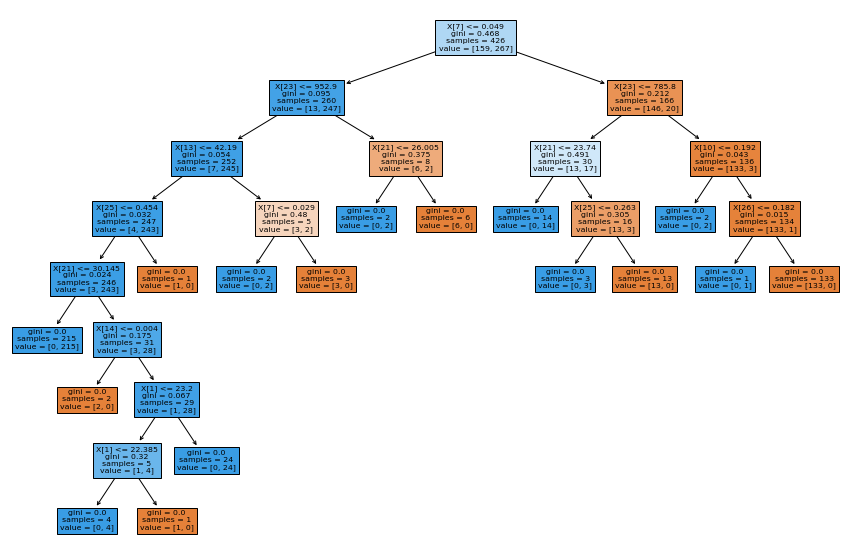

In [4]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True)

## Cost-complexity pruning

In [5]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# ccp_alphas = a list containing costs at each level of the tree
# impurities = a list containing impurities at each level of the tree

In [6]:
clf = []
for ccp_alpha in ccp_alphas:
    clfCurr = DecisionTreeClassifier(
        random_state=0,
        ccp_alpha=ccp_alpha
    )
    clfCurr.fit(x_train, y_train)
    clf.append(clfCurr)
    
print("Number of nodes in the last tree is", clf[-1].tree_.node_count, " with ccp alpha as", ccp_alphas[-1])

Number of nodes in the last tree is 1  with ccp alpha as 0.3272984419327777


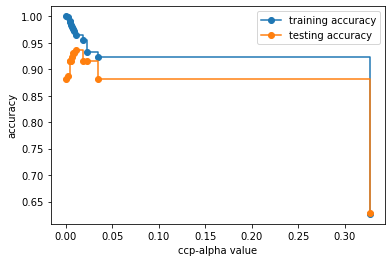

In [7]:
train_scores = [clfCurr.score(x_train, y_train) for clfCurr in clf]
test_scores = [clfCurr.score(x_test, y_test) for clfCurr in clf]

fig, ax = plt.subplots()
ax.set_xlabel("ccp-alpha value")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas, train_scores, label="training accuracy", marker='o', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, label="testing accuracy", marker='o', drawstyle='steps-post')
plt.legend()
plt.show()

<font size="5">Take the ccp-alpha value with best testing accuracy</font>

In [8]:
import numpy as np
best_clf = clf[np.argmax(test_scores)]
best_ccp = ccp_alphas[np.argmax(test_scores)]
print(best_ccp, accuracy_score(best_clf.predict(x_test), y_test))

0.011443661971830986 0.9370629370629371


[Text(418.5, 713.475, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(209.25, 509.625, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(104.625, 305.775, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(313.875, 305.775, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(627.75, 509.625, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(523.125, 305.775, 'X[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(418.5, 101.92499999999995, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(627.75, 101.92499999999995, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(732.375, 305.775, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

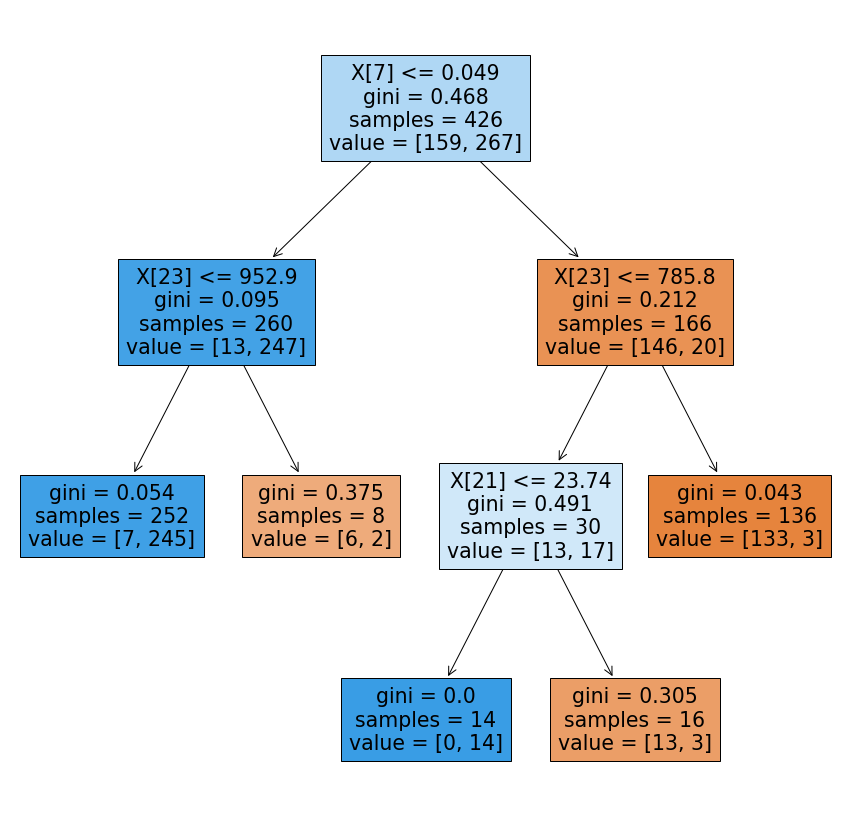

In [9]:
plt.figure(figsize=(15, 15))
tree.plot_tree(best_clf, filled=True)

**<font size="6">Regression Trees</font>**

1. the concepts of entropy,information gain and Gini index are used for Classification-decision trees.

2. in classification trees, the splitting at each node leads to samples of separate classes ending up in separate bags
    1. as discussed earlier for numerical variables the splitting depends on a threshold of value for that numerical variable
    
    2. for samples that not qualify this cutoff are grouped into one bag, and the average of their output/dependent feature is calculated
    
3. in regression trees, instead of enumerating the samples based on class-labels, the average of the output variable values of these observations is calculated

4. Entropy as a measure of impurity is a useful criteria for **classification**. 

5. in case of regression trees, **impurity** is defined as the weighted mean squared error of the children nodes
    
    1. MSE(t) = <font size="5">$\frac{1}{N_t}\sum\limits_{i\epsilon D_t}\left(y^{(i)} - \hat{y}_t\right)^2$</font>, where $N_t$ = number of training samples at node t, $D_t$ = training subset at node t, $\hat{y}_t$ is the predicted value = sample mean = <font size="4">$\frac{1}{N_t}\sum\limits_{i\epsilon D_t}y^{(i)}$</font>
    
    2. this is also called as sum of **squarred residuals**.
    
6. mean absolute error MAE may also be used instead
    1. MAE(t) = <font size="5">$\frac{1}{N_t}\sum\limits_{i\epsilon D_t}|y^{(i)} - \hat{y}_t|$</font>
    
    2. the predicted value = sample mean  $\Rightarrow \hat{y}$ = <font size="4">$\frac{1}{N_t}\sum\limits_{i\epsilon D_t}y^{(i)}$</font>
    
7. splitting:
    
    1. any kind of split for the current categorical variable will lead to 2 nodes being created, lets call them $t_1 \textrm{ and } t_2$

    2. hence calculate MSE($t_1$) and MSE($t_2$), sum them up.

    3. a split for which this sum is the least will be considered for splitting at current node.
    
## Evaluation metric

1. the `sklearn.tree.DecisionTreeRegressor` object has a method called `.score()` that gives an **R$^2$** as its output, when supplied with validation data and its output

2. this is called **coefficient of determination**, and is pronounced as "r-squared"

3. sum of squared residuals is calculated:
    
    1. SS$_{\textrm{tot}}$(total sum of squares) = $\sum\limits_{i=1}^N \left(y^{(i)} - \bar{y} \right)^2$ , where $\bar{y} = \frac{1}{N}\sum\limits_{i=1}^N y^{(i)}$
    
    2. SS$_{\textrm{res}}$(sum of squared residuals) = $\sum\limits_{i=1}^N \left(y^{(i)} - \hat{y}^{(i)} \right)^2$
    
3. R$^2$ = 1 - $\frac{SS_{\textrm{res}}}{SS_{\textrm{tot}}}$

4. best case, SSR = 0, hence R$^2$ = 1, if SSR too large, it may exceed SST, thus producing <font color="red"> negative R$^2$ values</font>

In [10]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
from sklearn.tree import DecisionTreeRegressor as DTR

# lets try without pruning
dtr = DTR(
    criterion="mae",
    splitter="random",
    random_state=0
)

dtr.fit(x_train, y_train)

print("Accuracy = ", dtr.score(x_test, y_test))
print("Depth of the tree hence built is:", dtr.get_depth())
print("Number of leaves are:", dtr.get_n_leaves())

Accuracy =  0.6608156968174702
Depth of the tree hence built is: 19
Number of leaves are: 363


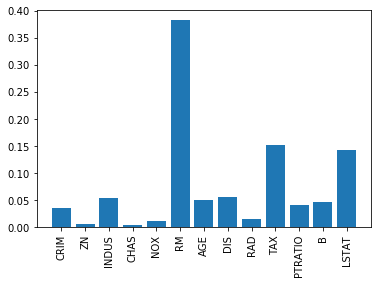

In [12]:
%matplotlib inline
plt.bar([i for i in range(len(dtr.feature_importances_))], dtr.feature_importances_)
plt.xticks(np.arange(len(dtr.feature_importances_)), labels=load_boston().feature_names, rotation='vertical')
plt.show()

# Pruning <font color="red">Regression</font> Trees

1. cost-complexity pruning

    1. calculate sum of squared residuals(SSR) at each parent node, i.e where splitting occurs
    
    2. sum these node-wise SSR to get the total SSR
    
    3. now calculate this total SSR, after cutting off the last level of nodes, i.e. pruning the last levels, i.e. bottom-up pruning.
    
    4. it is usually expected that the full sized tree will have the least error, since its a classic case of overfit decision tree $Rightarrow$ low bias + high variance
    
    5. hence, Tree Score = SSR + **$\alpha$.T**, where T = total number of leaves of this tree, the last term denotes the **tree-complexity penalty**
    
    6. $\alpha$ is a tuning parameter, which is found using Cross-Validation.
    
    7. Now, the tree with the least Tree-Score is to be picked.
    
    8. <font color="red">different values of alpha will impact the pruning, and which tree is picked in the end as well.</font>
    
    9. using k-fold Cross-Validation, the $\alpha$ value for which the lowest MSE value is observed should be chosen as the final $\alpha$ and the corresponding tree should be chosen as the best tree.

In [13]:
path = dtr.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

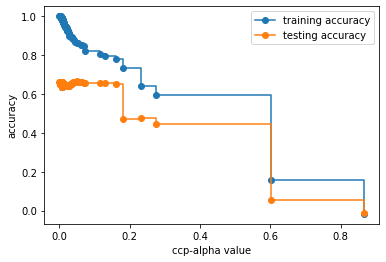

In [14]:
dtrs = []
for ccp_alpha in ccp_alphas:
    dtr = DTR(
        criterion="mae",
        splitter="random",
        random_state=0,
        ccp_alpha=ccp_alpha
    )
    dtr.fit(x_train, y_train)
    dtrs.append(dtr)

train_scores, test_scores = [model.score(x_train, y_train) for model in dtrs], [model.score(x_test, y_test) for model in dtrs]

fig, ax = plt.subplots()
ax.set_xlabel("ccp-alpha value")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas, train_scores, label="training accuracy", marker='o', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, label="testing accuracy", marker='o', drawstyle='steps-post')
plt.legend()
plt.show()

In [15]:
import numpy as np
best_dtr = dtrs[np.argmax(test_scores)]
best_ccp = ccp_alphas[np.argmax(test_scores)]
print(best_ccp, best_dtr.score(x_test, y_test))

print("Depth of the tree hence built is:", best_dtr.get_depth())
print("Number of leaves are:", best_dtr.get_n_leaves())

0.05118733509234846 0.6661952949883823
Depth of the tree hence built is: 6
Number of leaves are: 17


we can see a major improvement in the depth(19 to 6) and number of leaves(363 to 17) for the pruned tree, and also a minor accuracy improvement

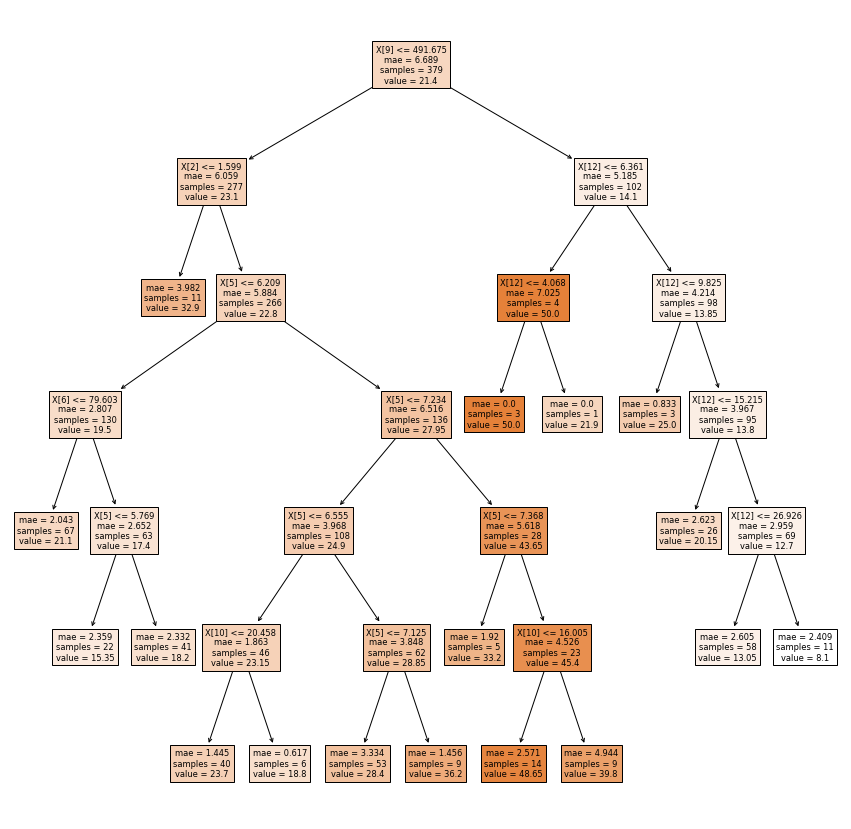

In [16]:
plt.figure(figsize=(15, 15))
tree.plot_tree(best_dtr, filled=True)
plt.show()

# Importance of decision trees

1. interpretable, which means that after we build the model, we can also make inferences about our data, not just predictions. In sklearn, we can do this using the `.feature_importances_ attribute`.

2. 

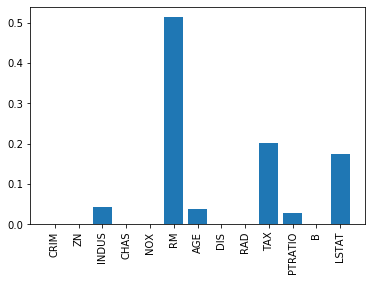

In [17]:
%matplotlib inline
plt.bar([i for i in range(len(best_dtr.feature_importances_))], best_dtr.feature_importances_)
plt.xticks(np.arange(len(best_dtr.feature_importances_)), labels=load_boston().feature_names, rotation='vertical')
plt.show()

# Interview Questions

1. Impact of outliers on decision trees
    
    1. 
    
2. usually have low bias and high variance
    
    1. at full depth training of any decision tree model, w.r.t. a training dataset, the decision tree tends to get overfitted, since the act of it being drawn to its full depth means that we are specifically trying to make our model rote-learn the outputs from training samples, rather than actually learning the relations between various features at hand, and their impact on the output.
    
    2. how to reduce this high variance?
    
3. which all libraries used to create the decision trees?
    
    1. 